# Kannada MNIST
## MNIST like dataset for Kannada handwritten digits

**Competition Description**

The goal of this competition is to provide a simple extension to the classic [MNIST competition](https://www.kaggle.com/c/digit-recognizer/) we're all familiar with. Instead of using Arabic numerals, it uses a recently-released dataset of Kannada digits.

Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script. [Wikipedia](https://en.wikipedia.org/wiki/Kannada)

![kannada mnist](https://storage.googleapis.com/kaggle-media/competitions/Kannada-MNIST/kannada.png)

This competition uses the same format as the MNIST competition in terms of how the data is structured, but it's different in that it is a synchronous re-run Kernels competition. You write your code in a Kaggle Notebook, and when you submit the results, your code is scored on both the public test set, as well as a private (unseen) test set.

**Goal**

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, we should predict the correct label.

**Metric**

This competition is evaluated on the categorization accuracy of your predictions (the percentage of images we get correct).



## Install and Import All Neccessary Tools

Since this is computer vision competition, we are trying to solve using CNN with Tensorflow.

In [0]:
!pip install tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import applications

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

## Function to Evaluate Our Model

In [0]:
def plot_history(history):
  plt.rcParams['figure.figsize'] = [12, 4]
  plt.subplots_adjust(wspace=0.2)

  plt.subplot(121)
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'])

  plt.subplot(122)
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'])
  plt.show()

## Load Dataset MNIST-Kannada

Reshape all the data into (28,28)

In [5]:
data_train = pd.read_csv("https://drive.google.com/uc?export=download&id=1UGvx4rcEyCoi-_roGlsjP_AH5UiXDgxL")
data_test = pd.read_csv("https://drive.google.com/uc?export=download&id=1sp27GOjM1JkCvJ1gAjPiMTip9o9ZdX47")

X_train = data_train[data_train.columns[1:]].values.reshape(data_train.shape[0], 28, 28, 1)
y_train = data_train['label'].values
X_test = data_test[data_test.columns[1:]].values.reshape(data_test.shape[0], 28, 28, 1)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)

X_train.shape = (60000, 28, 28, 1)
y_train.shape = (60000,)
X_test.shape  = (5000, 28, 28, 1)


## Visualize MNIST-Kannada Data

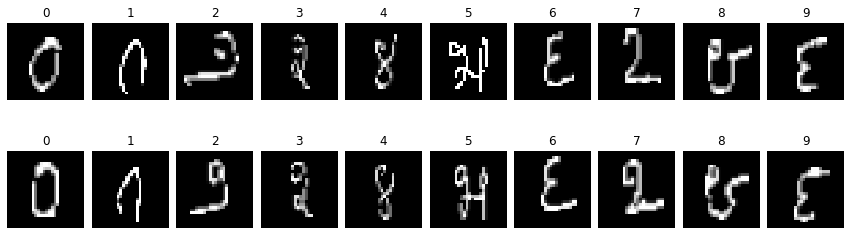

In [6]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10].reshape(28,28), cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

## Split Data Train and Data Validation

This partition aims to evaluate the model we made using data validation.

In [7]:
data_val = pd.read_csv("https://drive.google.com/uc?export=download&id=1UGvx4rcEyCoi-_roGlsjP_AH5UiXDgxL")
X_val = data_val[data_val.columns[1:]].values.reshape(data_val.shape[0], 28, 28, 1)
y_val = data_val['label'].values

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (60000, 28, 28, 1)
y_val.shape   = (60000,)
X_train.shape = (60000, 28, 28, 1)
y_train.shape = (60000,)


## One Hot Matrix

In [8]:
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)

y_train_hot.shape = (60000, 10)
y_val_hot.shape   = (60000, 10)


## Design Our CNN Architecture

In [9]:
model = Sequential([
          Conv2D(128, kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1), activation='relu'),
          Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
          MaxPooling2D(),
          Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
          MaxPooling2D(),
          Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
          GlobalAveragePooling2D(),
          Dense(512, activation='relu'),
          Dense(256, activation='relu'),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax')
], name='MyModel')
model.summary()

Model: "MyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 128)       3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0   

## Visualize Our CNN Architecture

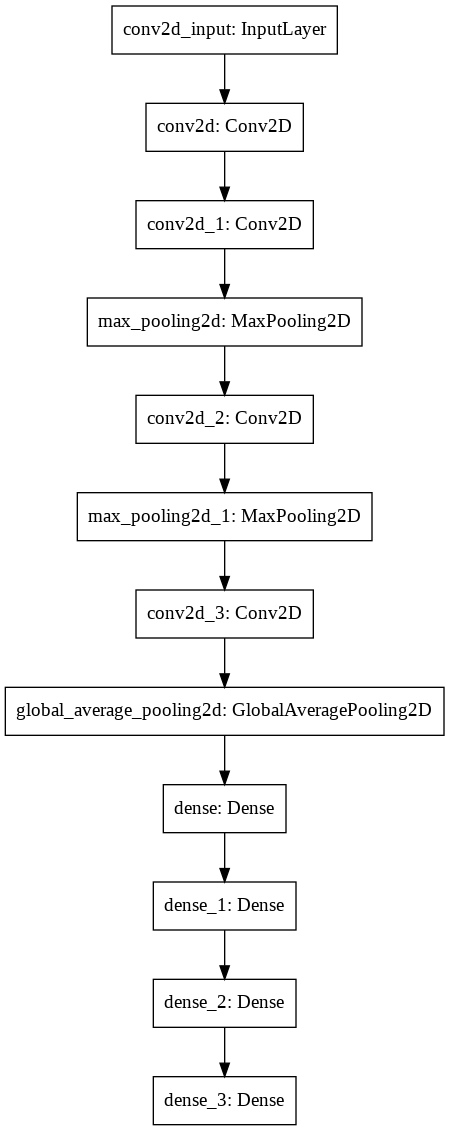

In [10]:
plot_model(model)

## Train Our Model

In [11]:
epochs = 20
batch_size = 1000
history = {}

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history[model.name] = model.fit(X_train, y_train_hot,
                      validation_data=(X_val, y_val_hot),
                      epochs=epochs,
                      batch_size=batch_size,
                      verbose=2)

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 - 24s - loss: 1.5189 - accuracy: 0.4746 - val_loss: 0.3801 - val_accuracy: 0.8657
Epoch 2/20
60000/60000 - 19s - loss: 0.1512 - accuracy: 0.9514 - val_loss: 0.0770 - val_accuracy: 0.9758
Epoch 3/20
60000/60000 - 19s - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0606 - val_accuracy: 0.9802
Epoch 4/20
60000/60000 - 20s - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 5/20
60000/60000 - 20s - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0330 - val_accuracy: 0.9904
Epoch 6/20
60000/60000 - 20s - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 7/20
60000/60000 - 20s - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0265 - val_accuracy: 0.9916
Epoch 8/20
60000/60000 - 20s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 9/20
60000/60000 - 20s - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0160 - val_accuracy: 0.9948
Epoch

## Evaluate Our Model

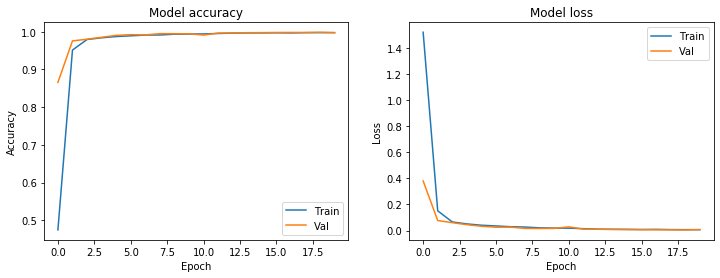

In [12]:
plot_history(history[model.name])

## Predict Data Test

In [13]:
predictions = model.predict(X_test.astype('float32'))
len(predictions)

5000

## Visualize Some Data Test Prediction

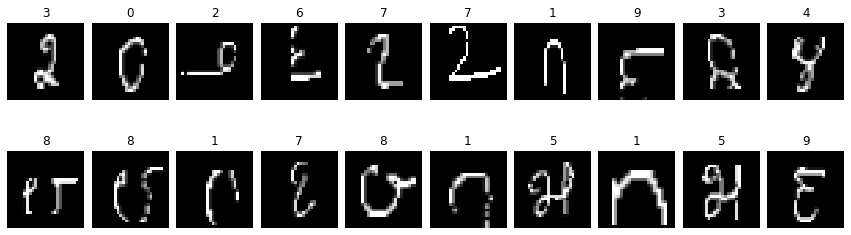

In [14]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_test[i+j*10].reshape(28,28), cmap='gray')
        ax[j,i].set_title(np.argmax(predictions[i+j*10]))
        ax[j,i].axis('off')
plt.show()

## Submit Prediction

In [0]:
submission = pd.read_csv("https://drive.google.com/uc?export=download&id=1GwgZ3mHkitSjFkSujq9VuFG141Mt5aMg")
submission['label'] = np.argmax(predictions, axis=1)

In [0]:
submission.to_csv("submission1.csv",index=False)